<a href="https://colab.research.google.com/github/phionex2/Deep-Learning/blob/main/Xavier_glorat(He_Initialization).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/ushape.csv')

In [ ]:
df.head()

,X,Y,class
0,0.0316,0.9870,0.0
1,2.1200,-0.0462,1.0
2,0.8820,-0.0758,0.0
3,-0.0551,-0.0373,1.0
4,0.8300,-0.5390,1.0


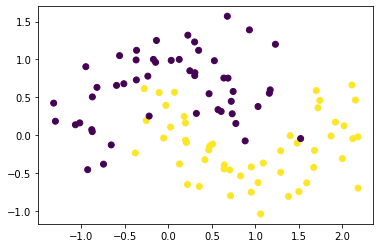

In [ ]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [ ]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2,kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 10)                30        
                                                                 
 dense_23 (Dense)            (None, 10)                110       
                                                                 
 dense_24 (Dense)            (None, 10)                110       
                                                                 
 dense_25 (Dense)            (None, 10)                110       
                                                                 
 dense_26 (Dense)            (None, 1)                 11        
                                                                 
Total params: 371
Trainable params: 371
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.get_weights()

[array([[ 0.9634355 ,  2.008911  , -0.34264505,  0.6884312 ,  0.7782312 ,
         -0.6561154 ,  0.14167677,  0.9779885 ,  0.9325577 ,  1.1402048 ],
        [-0.16728629,  1.4618363 , -0.8058679 , -0.50964737, -0.866167  ,
          0.5496935 ,  0.13310157,  1.0779827 , -0.6639141 , -0.01463179]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.10539851,  0.48526895,  0.714316  , -0.18866718, -0.7250839 ,
          0.22085175,  0.7534904 ,  0.36095998, -0.6742738 ,  0.5922916 ],
        [-0.6299539 ,  0.10253704,  0.30383942, -0.45836744, -0.09067469,
         -0.10327455,  0.11008824, -0.01055317, -0.16426785,  0.10706678],
        [-0.01778925,  0.6664191 ,  0.6245424 , -0.03912661,  0.0080572 ,
          0.6449524 , -0.5234461 ,  0.30333588,  0.33092707,  0.3393051 ],
        [-0.00530986, -0.9603113 ,  0.5049274 ,  0.22863166, -0.45042127,
         -0.2503643 ,  0.1029162 ,  0.25492725, -0.29852968,  0.48624536],
        [-0.86472

In [ ]:
initial_weights = model.get_weights()

In [ ]:
initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [ ]:
model.set_weights(initial_weights)

In [ ]:
model.get_weights()

[array([[-0.9083814 , -0.42979184, -0.53292066, -0.8351218 , -0.16821018,
         -0.17595254,  0.44825128, -0.3543974 , -0.26178998, -1.1923412 ],
        [ 0.91741747,  0.3588762 ,  0.50364774, -0.10173513,  0.2106472 ,
         -0.21627867, -0.18277432, -0.6875152 ,  0.35624236,  0.4325114 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.14801227,  0.2561245 ,  0.10928258, -0.20176922,  0.00727606,
          0.42879048,  0.13790296, -0.4391284 , -0.06173414, -0.5698351 ],
        [-0.7840016 , -0.05161778,  0.06571397, -0.3170529 ,  0.41050068,
         -0.03985342, -0.580036  ,  0.294646  , -0.01483387, -0.06064747],
        [-0.07505108, -0.05698978,  0.1829229 , -0.13824858,  0.41852456,
         -0.663167  , -0.08177052,  0.23831266, -0.21426578, -0.30900267],
        [-0.26688266, -0.0863719 ,  0.41794643, -0.03646072,  0.02351558,
         -0.28430468,  0.2584214 , -0.1209321 ,  0.4445468 ,  0.05717354],
        [ 0.34896

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 1s 85ms/step - loss: 1.7058 - accuracy: 0.5000 - val_loss: 1.6510 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 15ms/step - loss: 1.6300 - accuracy: 0.5125 - val_loss: 1.5720 - val_accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 15ms/step - loss: 1.5416 - accuracy: 0.5125 - val_loss: 1.4990 - val_accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 0s 14ms/step - loss: 1.4703 - accuracy: 0.5125 - val_loss: 1.4281 - val_accuracy: 0.5500
Epoch 5/100
3/3 [==============================] - 0s 15ms/step - loss: 1.3973 - accuracy: 0.5125 - val_loss: 1.3605 - val_accuracy: 0.5500
Epoch 6/100
3/3 [==============================] - 0s 15ms/step - loss: 1.3355 - accuracy: 0.4875 - val_loss: 1.2960 - val_accuracy: 0.5000
Epoch 7/100
3/3 [==============================] - 0s 23ms/step - loss: 1.2629 - accuracy: 0.5000 - val_loss: 1.2362 - val_accuracy: 0.5000
Epoch 8/100
3/3 [===

In [ ]:
model.get_weights()

[array([[-0.7534644 , -0.40642726, -0.46373174, -0.7715832 , -0.1277438 ,
         -0.2729551 ,  0.34282172, -0.2771892 , -0.26632193, -1.429772  ],
        [ 1.0737787 ,  0.47488663,  0.62465155, -0.12547861,  0.20325062,
         -0.28902182, -0.28489602, -0.7651134 ,  0.32014093,  0.38592413]],
       dtype=float32),
 array([ 0.17320989,  0.00114872,  0.0397424 , -0.13545433,  0.00454802,
        -0.22851905, -0.04516467,  0.15110366, -0.06830908,  0.17423655],
       dtype=float32),
 array([[ 0.07947282,  0.26585355,  0.15415847, -0.25968108, -0.01067472,
          0.37633535,  0.03868366, -0.38048545, -0.19025889, -0.65158546],
        [-0.85772514, -0.04266584,  0.12410757, -0.38518146,  0.4134989 ,
         -0.11743478, -0.66751945,  0.37822312, -0.16036926, -0.14447264],
        [-0.14926817, -0.04317714,  0.24179652, -0.20616755,  0.4172752 ,
         -0.737155  , -0.17425217,  0.3156445 , -0.3552739 , -0.395115  ],
        [-0.26271275, -0.16797927,  0.30563584, -0.03270569, 

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


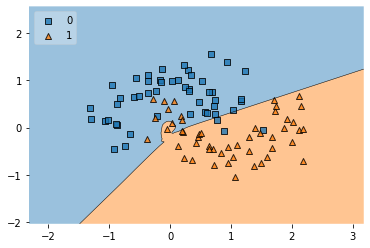

In [ ]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

In [ ]:
(np.random.randn(10,10)*0.01).min()

-0.01538420487066039

In [ ]:
(np.random.randn(10,10)*0.01).max()

0.02825126600648443